# Problem definition
The aim of this code is to build a machine learning model that can classify images of handwritten digits into their respective numerical values.

# Data

 The dataset used for this task is the MNIST dataset, which is a collection of 70,000 grayscale images of handwritten digits, each of size 28x28 pixels.

The code first imports the required libraries, including TensorFlow, NumPy, and Matplotlib. The MNIST dataset is then loaded using the TensorFlow Keras library. The dataset is split into a training set and a test set, each containing images and their respective labels.

In [1]:
# Importing the require libraries
import os, cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# loading the dataset
mnist=tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'c:\\Users\\Engr M2j\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

In [3]:

(x_train, y_train), (x_test,y_test)=mnist.load_data()
y_test[0:10]


array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

[[<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
  <AxesSubplot: >]
 [<AxesSubplot: > <AxesSubplot: > <AxesSubplot: > <AxesSubplot: >
  <AxesSubplot: >]]
Figure(1000x400)


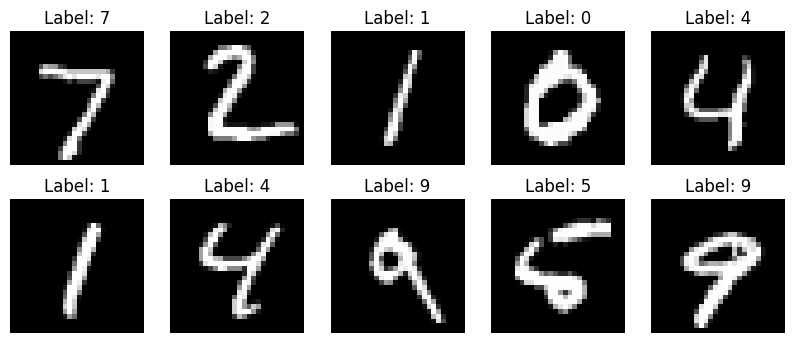

In [4]:
# plot the first 10 images from the test set
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
# print (fig)
print(axs)
print(fig)
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(x_test[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Label: {}'.format(y_test[i]))
plt.show()

# preprocessing
The code below preprocess the data by normalizing the pixel values of the images. This is done to ensure that the pixel values fall within a common range, making it easier for the model to learn and generalize.

In [5]:
#preprocessing
#normalizing the x_train and x_test

x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

# Building the model
A feedforward neural network model is built using the TensorFlow Keras Sequential API. The model has three dense layers, with the first layer being a Flatten layer that flattens the 2D input images into a 1D array. The two hidden layers have 128 neurons each and use the ReLU activation function. The output layer has 10 neurons (one for each digit from 0 to 9) and uses the softmax activation function to produce a probability distribution over the classes.

# simple feedforward neural network

In [6]:
#Buiding the models
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# compiling the model
The model is then compiled using the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy as the metric for evaluation. The summary of the model is printed to the console, which provides information about the number of parameters in the model and the layer-wise architecture of the model.

In [7]:
#Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 151,306
Trainable params: 151,306
Non-trai

# Training the model

Finally, the model is trained on the training data for 50 epochs using the fit() method. During training, the model learns to minimize the loss function and maximize the accuracy on the training data. The trained model can then be used to predict the classes of new images in the test set. 
# Modifying Training Parameter
The model gave an accuracy of 0.9881 when training with two hidden layers and 50 epochs. There was a great improvement from 0.9881 to 0.9987 when the hidden layers was increased to 4 layers and 50 epochs. When the hidden layers was increased to 8, the accuracy reduced to 0.9984. The hidden layers was reduced to 4 and 200 epochs which gave the best accuracy of 0.9997.

In [9]:
# Training the model
model.fit(x_train,y_train, epochs=1)

1875/1875 [==============================] - 12s 4ms/step - loss: 0.2521 - accuracy: 0.9226


# predicting the first 10 images

1/1 [==============================] - 0s 175ms/step


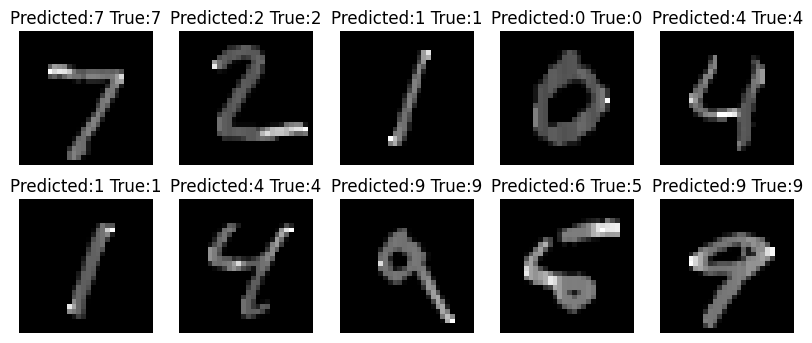

In [10]:
#predicting the first 10

import numpy as np

# predict the labels for the first 10 images
predictions = model.predict(x_test[:10])

# convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# display the predicted label, true label, and image for each image
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(x_test[i], cmap='gray')
    ax.axis('off')
    ax.set_title('Predicted:{} True:{}'.format(predicted_labels[i], y_test[i]))
plt.show()


# predict the labels for the last 10 images


1/1 [==============================] - 0s 26ms/step


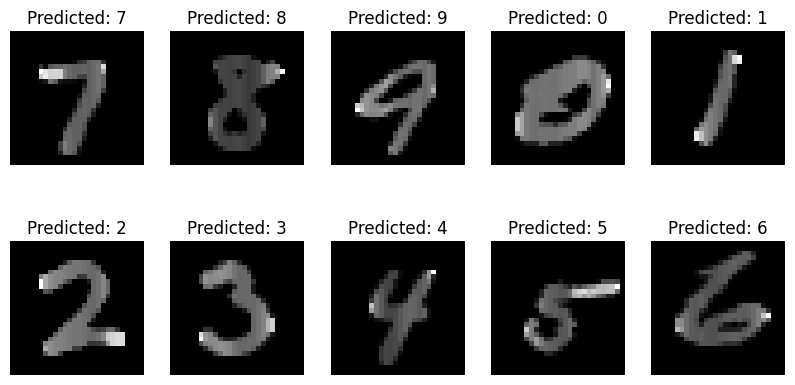

In [11]:


# predict the labels for the last 10 images
predictions = model.predict(x_test[-10:])

# convert the predictions from probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# display the predicted label, true label, and image for each image
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axs[i//5, i%5]
    ax.imshow(x_test[-10+i], cmap='gray')
    ax.axis('off')
    ax.set_title('Predicted: {}'.format(predicted_labels[i]))
plt.show()


# Predicting new images created with paint

In [17]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained model
model = ...

# Load your new image data
img_path = 'images/img_1.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode='grayscale')

# Convert the image to a numpy array
x = image.img_to_array(img)
x = x.astype('float32') / 255.0

# Reshape the data to match the input shape of the model
x = np.expand_dims(x, axis=0)

# Use the model to predict the class probabilities for the new image
preds = model.predict(x)

# Print the predicted class probabilities
print(preds)


AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'